# General 

In [27]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [18]:
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [15]:
seed = 7
# prepare models
all_models = []
all_models.append(('LR', LogisticRegression(random_state=seed)))
all_models.append(('LDA', LinearDiscriminantAnalysis()))
all_models.append(('KNN', KNeighborsClassifier()))
all_models.append(('CART', DecisionTreeClassifier(random_state=seed)))
all_models.append(('NB', GaussianNB()))
all_models.append(('SVM', SVC(random_state=seed)))
all_models.append(('RF', RandomForestClassifier(random_state=seed)))
all_models.append(('ETC', ExtraTreesClassifier(random_state=seed)))
all_models.append(('GBC', GradientBoostingClassifier(random_state=seed)))
all_models.append(('ABC', AdaBoostClassifier(DecisionTreeClassifier(random_state=seed),random_state=seed,learning_rate=0.1)))

In [16]:
for _, model in all_models:
    print(str(model.__class__).split(".")[-1][:-2])

LogisticRegression
LinearDiscriminantAnalysis
KNeighborsClassifier
DecisionTreeClassifier
GaussianNB
SVC
RandomForestClassifier
ExtraTreesClassifier
GradientBoostingClassifier
AdaBoostClassifier


C:\python\python3_9\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python\python3_9\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

LogisticRegression: 0.7747436773752564 (0.044755153643750545)
LinearDiscriminantAnalysis: 0.7669685577580315 (0.04796563054016723)
KNeighborsClassifier: 0.7109876965140123 (0.0507915093681296)
DecisionTreeClassifier: 0.6940874914559126 (0.03936136384286375)
GaussianNB: 0.7591421736158578 (0.03895993346035058)
SVC: 0.760457963089542 (0.03471186731025681)
RandomForestClassifier: 0.7721462747778538 (0.05494294444887318)
ExtraTreesClassifier: 0.7656356801093642 (0.05302410032691928)
GradientBoostingClassifier: 0.7591934381408066 (0.05645131302735267)
AdaBoostClassifier: 0.688961038961039 (0.05419693508522166)


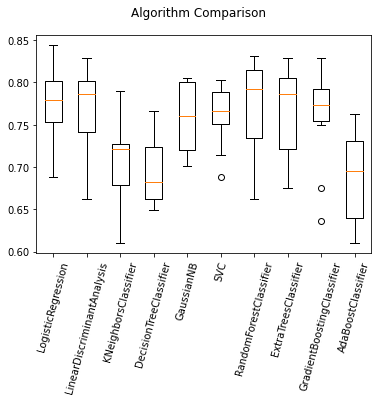

In [22]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for _, model in all_models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	model_name = str(model.__class__).split(".")[-1][:-2]
	names.append(model_name)
	msg = "%s: %f (%f)" % (model_name, cv_results.mean(), cv_results.std())
	msg = "{}: {} ({})".format(model_name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=75)
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV
# hyperparameter tunning for the bests models
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

              
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X,Y)

RFC_best = gsRFC.best_estimator_
# Best score
print(gsRFC.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


C:\python\python3_9\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\python\python3_9\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\python\python3_9\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\python\python3_9\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\python\python3_9\lib\site-packages\joblib\parallel.py", lin

0.7708133971291866


In [24]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X,Y)

GBC_best = gsGBC.best_estimator_

# Best score
print(gsGBC.best_score_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
0.7669172932330828


In [25]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()

## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X,Y)

ExtC_best = gsExtC.best_estimator_

# Best score
print(gsExtC.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


C:\python\python3_9\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\python\python3_9\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\python\python3_9\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\python\python3_9\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\python\python3_9\lib\site-packages\joblib\parallel.py", lin

0.7825529733424471


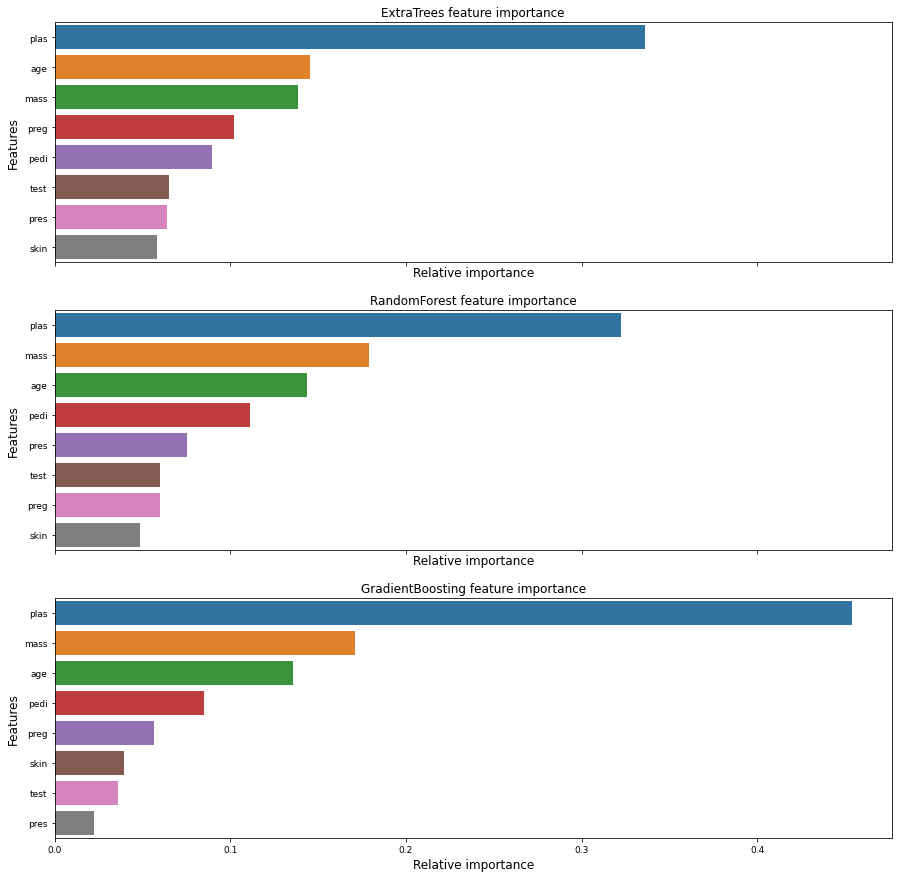

In [40]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("ExtraTrees",ExtC_best),
("RandomForest",RFC_best),
("GradientBoosting",GBC_best)]

for n, mo in enumerate(names_classifiers):
    plt.subplot(nrows, 1, n+1)
    name = names_classifiers[n][0]
    classifier = names_classifiers[n][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y=dataframe.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h')
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
plt.show()

In [ ]:
# predictions for the test data...
ExtC_best.predict(test)